<a href="https://colab.research.google.com/github/YathapuYaswanth/ML_LAB/blob/main/Another_copy_of_AP23110010623_Univariate_analysis_for_Numerical_and_Categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score,log_loss, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/ecommerceDataset.csv", encoding='latin-1', quotechar='"', engine='python', on_bad_lines='skip', header=None)
df.columns = ['category', 'description']

print(df.head())
print(df.info())

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

    category                                        description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
Numerical Columns: Index([], dtype='object')
Categorical Columns: Index(['category', 'description'], dtype='object')


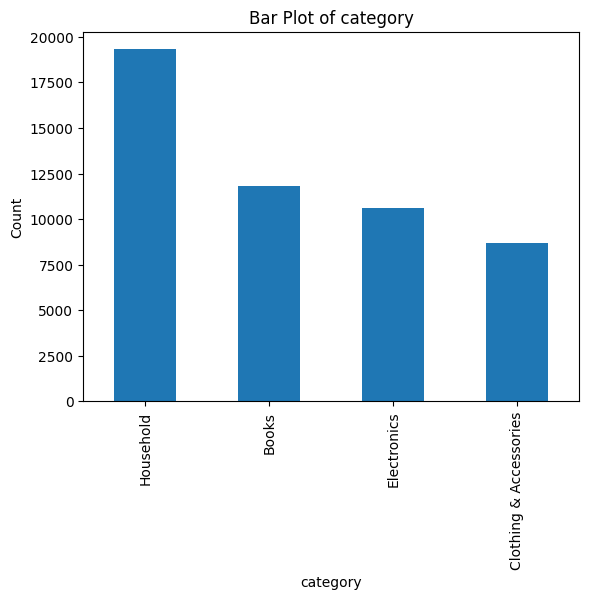

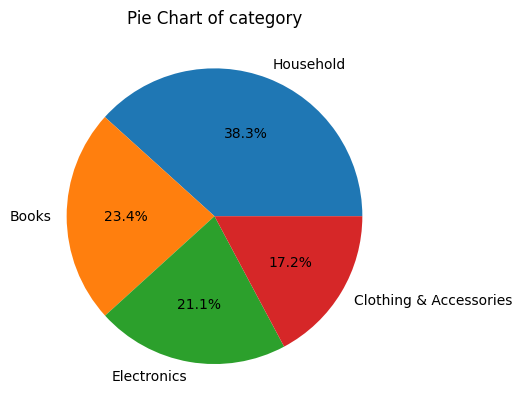

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from 

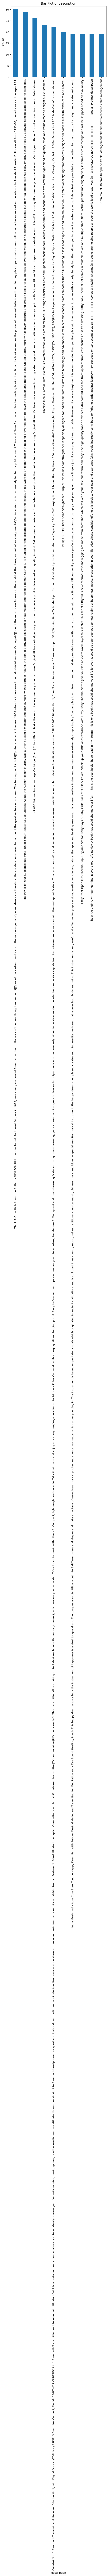

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


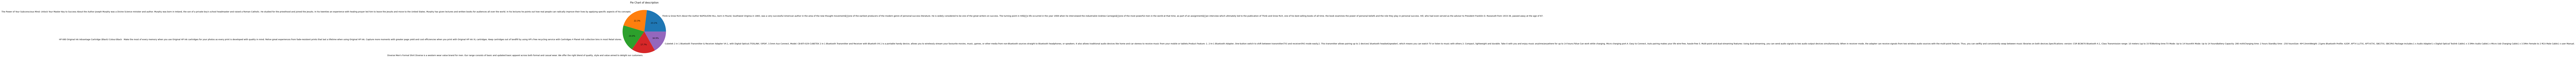

In [ ]:
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    plt.figure()
    df[col].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()


    category                                        description  price  rating
0  Household  Paper Plane Design Framed Wall Hanging Motivat...    225     2.9
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...    715     3.8
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...    374     2.3
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...    523     3.1
4  Household  Incredible Gifts India Wooden Happy Birthday U...    747     4.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     50425 non-null  object 
 1   description  50424 non-null  object 
 2   price        50425 non-null  int64  
 3   rating       50425 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB
None


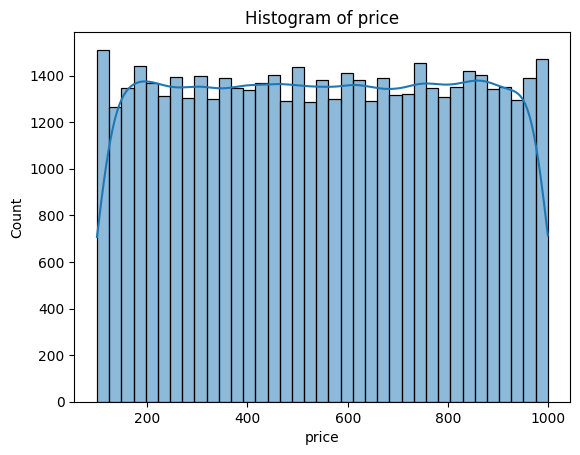

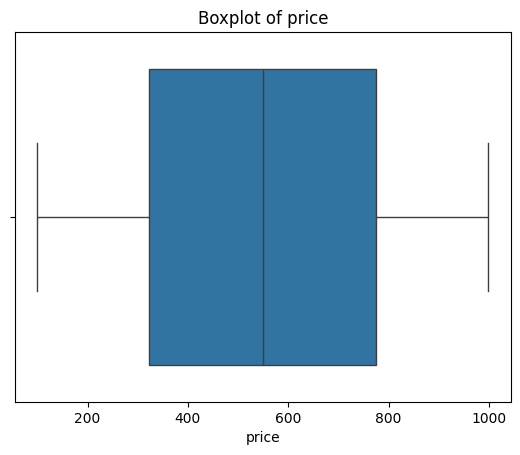

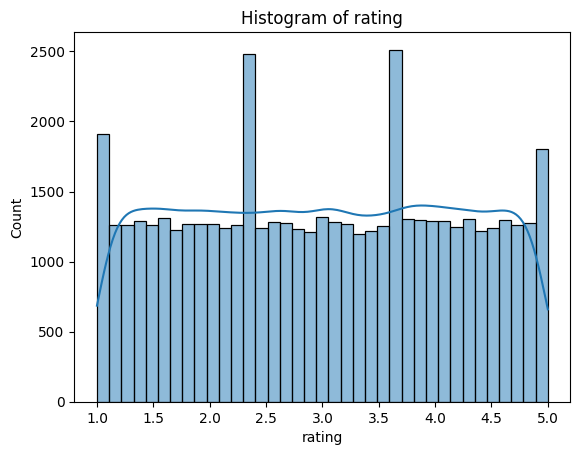

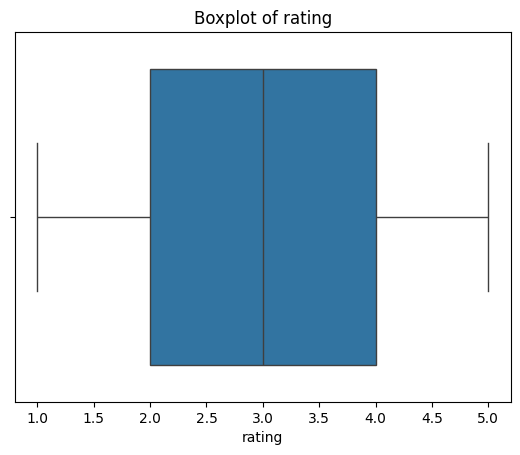

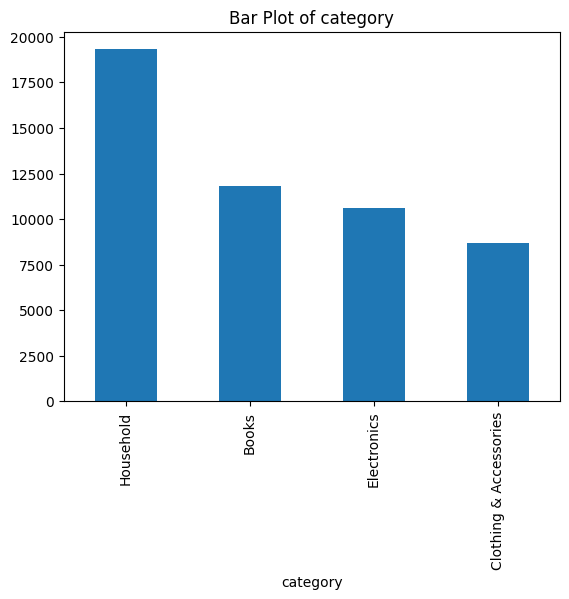

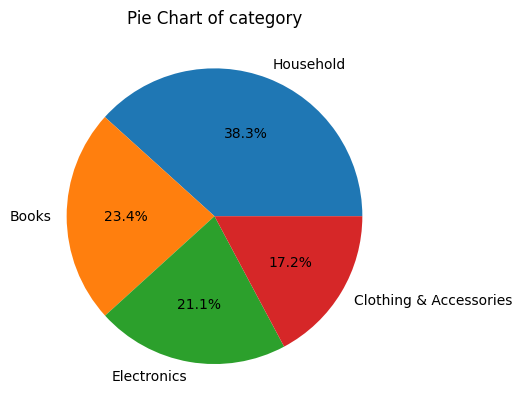

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from 

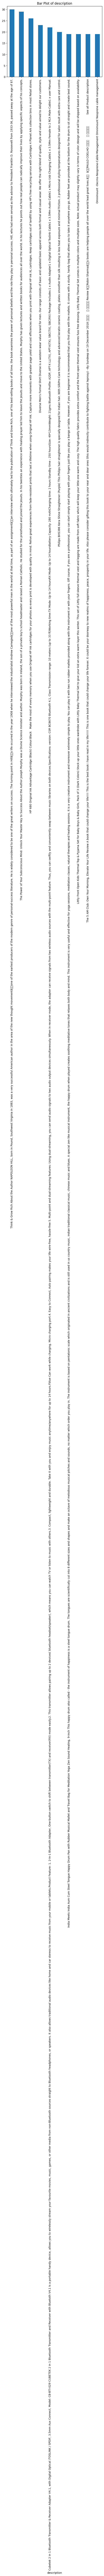

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


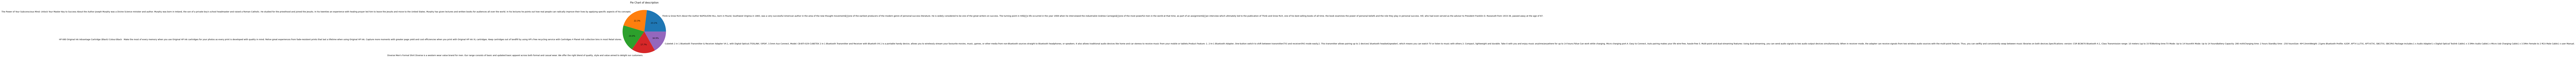

In [ ]:
df['price'] = np.random.randint(100, 1000, size=len(df))
df['rating'] = np.random.uniform(1, 5, size=len(df)).round(1)

print(df.head())
print(df.info())

num_cols = ['price', 'rating']
cat_cols = ['category', 'description']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

for col in cat_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.show()
    plt.figure()
    df[col].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

In [ ]:
print("Summary Statistics for Numerical Columns:")
print(df[num_cols].describe())

print("\nSummary Statistics for Categorical Columns:")
print(df[cat_cols].describe())


Summary Statistics for Numerical Columns:
              price        rating
count  50425.000000  50425.000000
mean     549.763094      2.997678
std      260.640883      1.155639
min      100.000000      1.000000
25%      323.000000      2.000000
50%      550.000000      3.000000
75%      776.000000      4.000000
max      999.000000      5.000000

Summary Statistics for Categorical Columns:
         category                                        description
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30


Missing Values in Each Column:
category       0
description    1
price          0
rating         0
dtype: int64


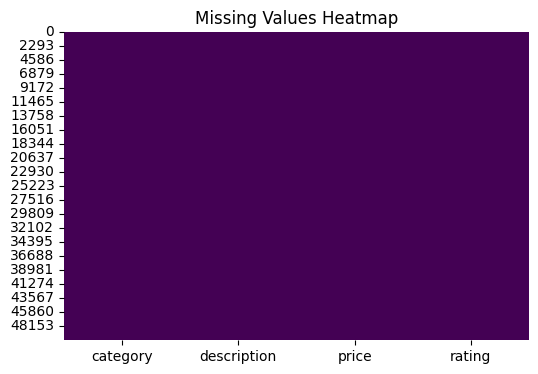

In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


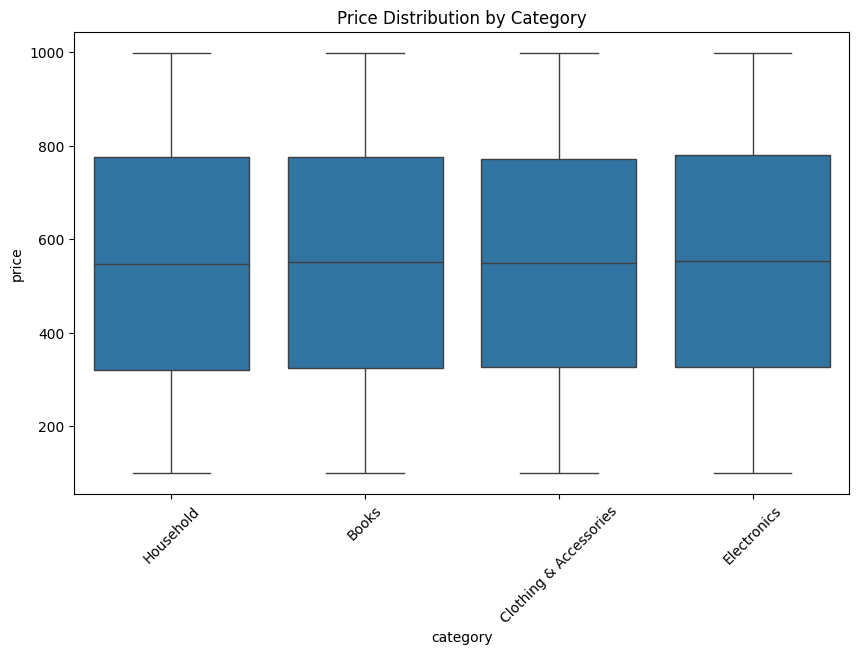

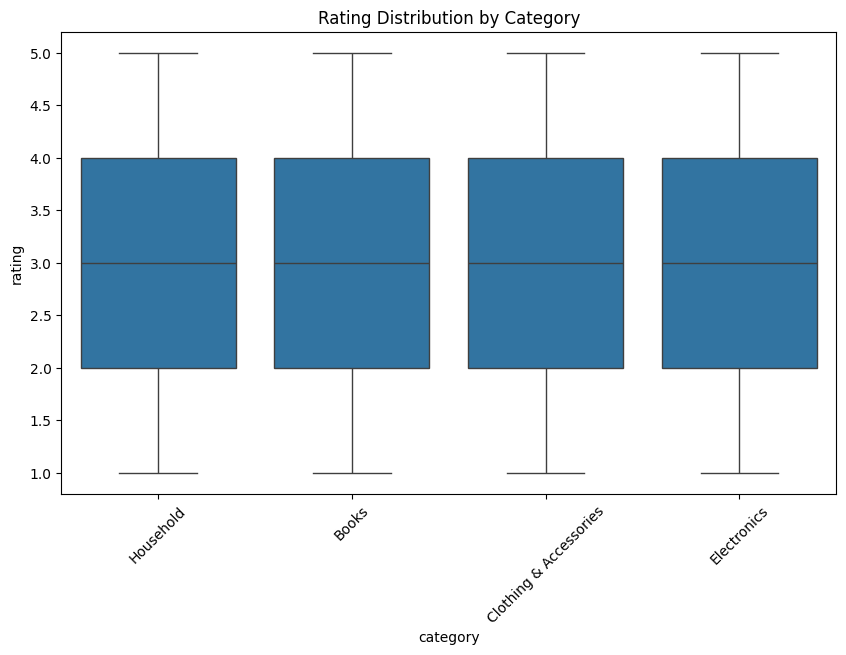

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='price', data=df)
plt.title("Price Distribution by Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='rating', data=df)
plt.title("Rating Distribution by Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


price: 0 outliers
rating: 0 outliers


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])
print(df[['category', 'category_encoded']].head())


    category  category_encoded
0  Household                 3
1  Household                 3
2  Household                 3
3  Household                 3
4  Household                 3


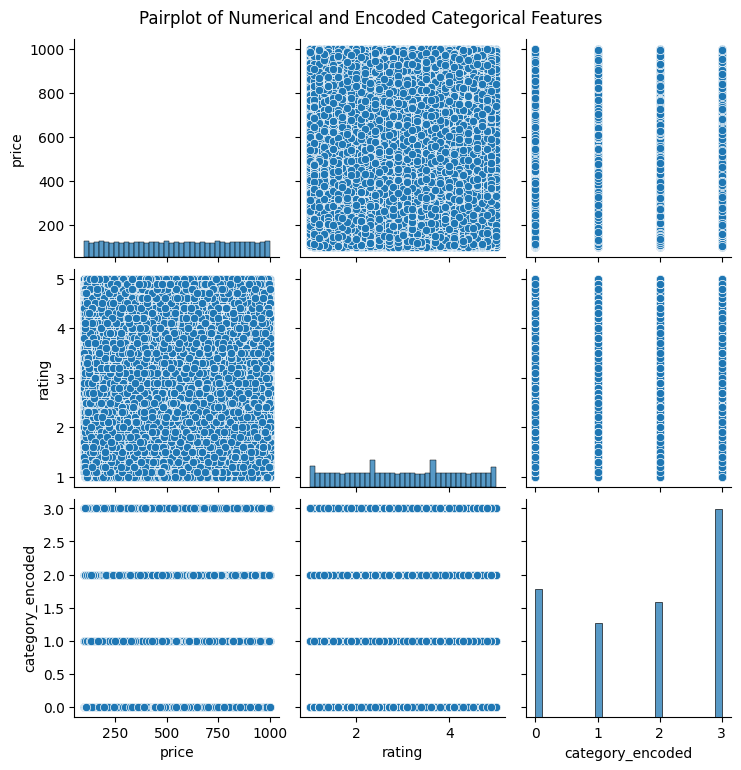

In [ ]:
sns.pairplot(df[['price', 'rating', 'category_encoded']])
plt.suptitle("Pairplot of Numerical and Encoded Categorical Features", y=1.02)
plt.show()


In [ ]:
df.to_csv("/content/ecommerceDataset_processed.csv", index=False)
print("Processed dataset saved successfully.")


Processed dataset saved successfully.


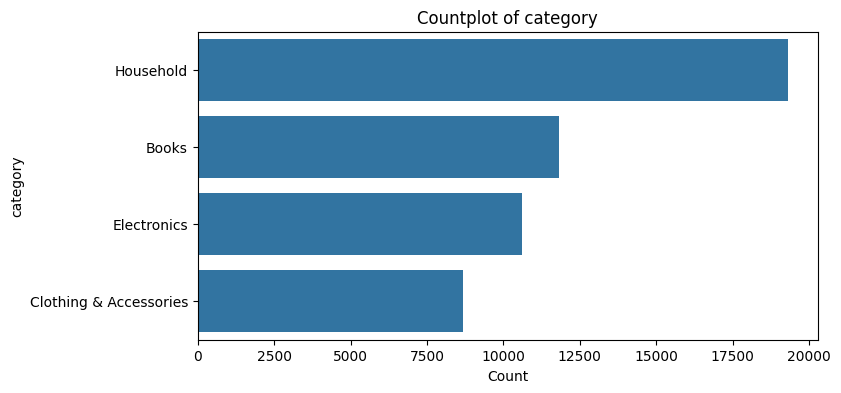

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from 

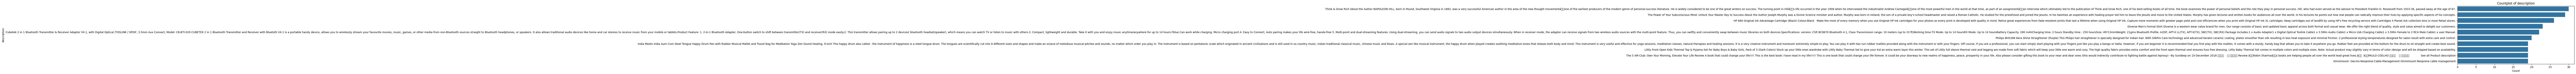

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.title(f"Countplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


/tmp/ipython-input-3539063160.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


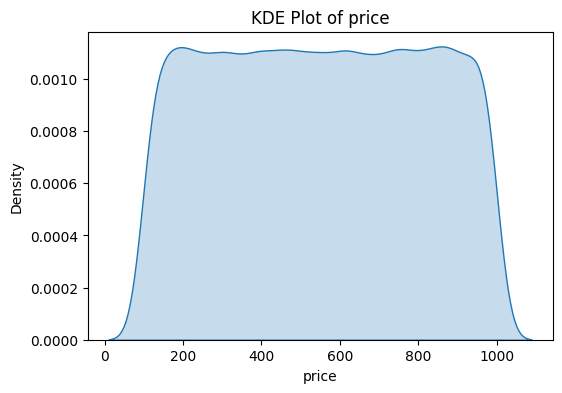

/tmp/ipython-input-3539063160.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


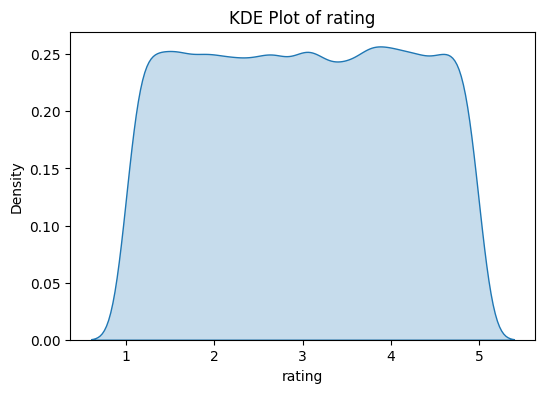

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()



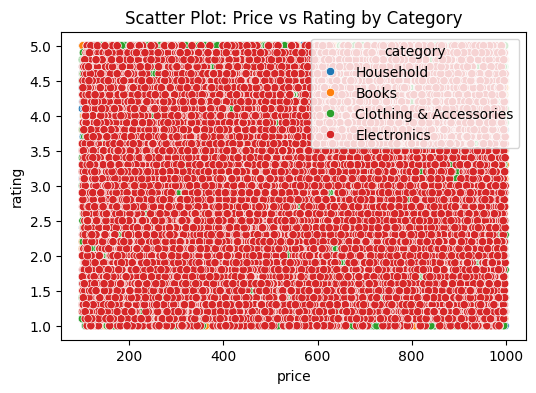

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='rating', hue='category', data=df)
plt.title("Scatter Plot: Price vs Rating by Category")
plt.show()


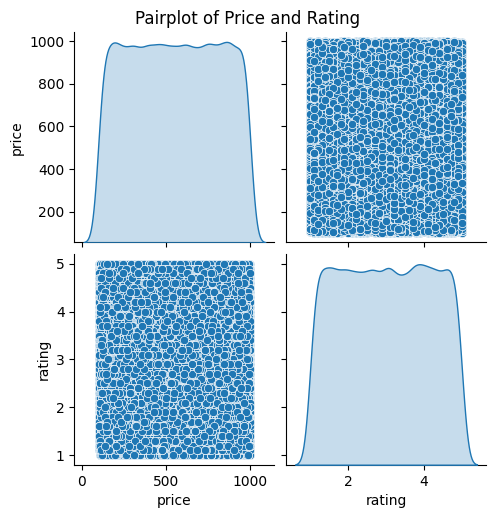

In [ ]:
sns.pairplot(df[['price', 'rating']], diag_kind='kde')
plt.suptitle("Pairplot of Price and Rating", y=1.02)
plt.show()


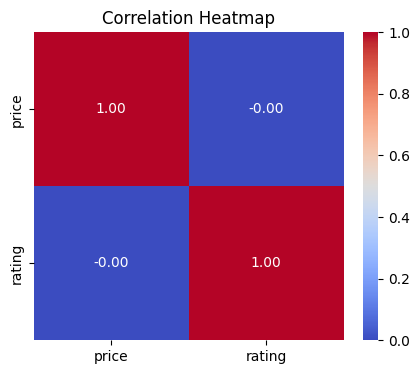

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


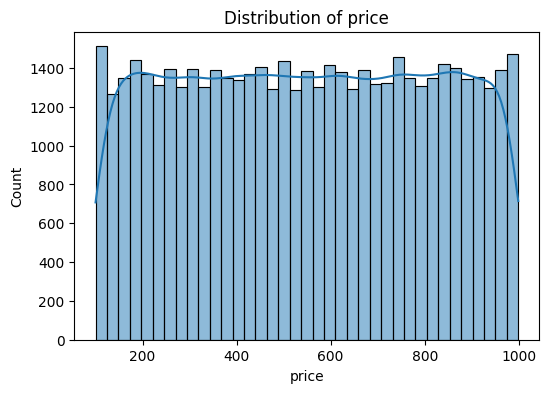

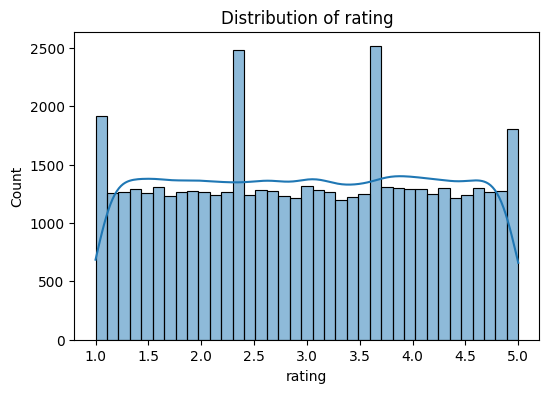

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


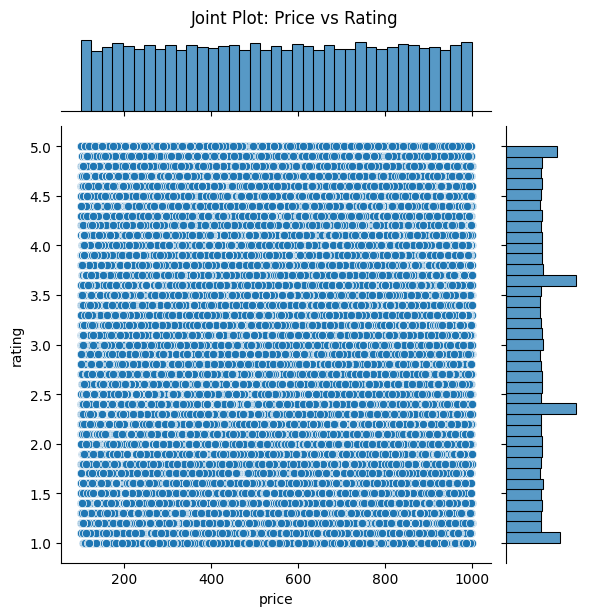

In [ ]:
sns.jointplot(x='price', y='rating', data=df, kind='scatter')
plt.suptitle("Joint Plot: Price vs Rating", y=1.02)
plt.show()


In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers (outside [{lower:.2f}, {upper:.2f}])")


price: 0 outliers (outside [-356.50, 1455.50])
rating: 0 outliers (outside [-1.00, 7.00])


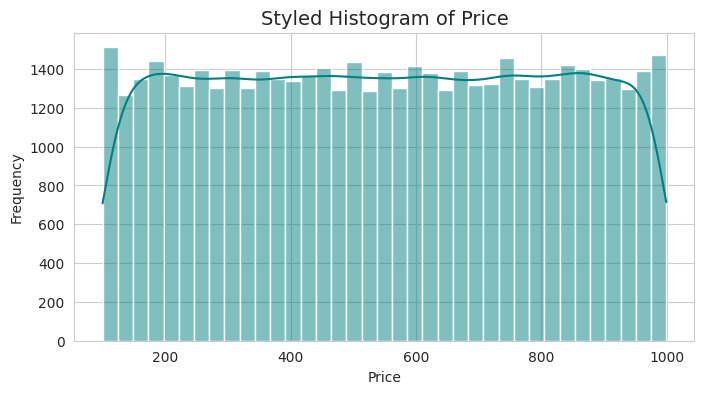

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True, color='teal')
plt.title("Styled Histogram of Price", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
